In [2]:
words = open('/Users/maximilianruess/Documents/GitHub/DeepLearning_101/data/names.txt').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
min(len(word) for word in words), max(len(word) for word in words), len(words)

(2, 15, 32033)

## Bigram Languge Model 

In [18]:
b = {}
for w in words: 
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [23]:
sorted(b.items(), key= lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [53]:
import torch 
N = torch.zeros((27, 27), dtype=torch.int32)

In [62]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [64]:
for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


## Count Array

(-0.5, 26.5, 26.5, -0.5)

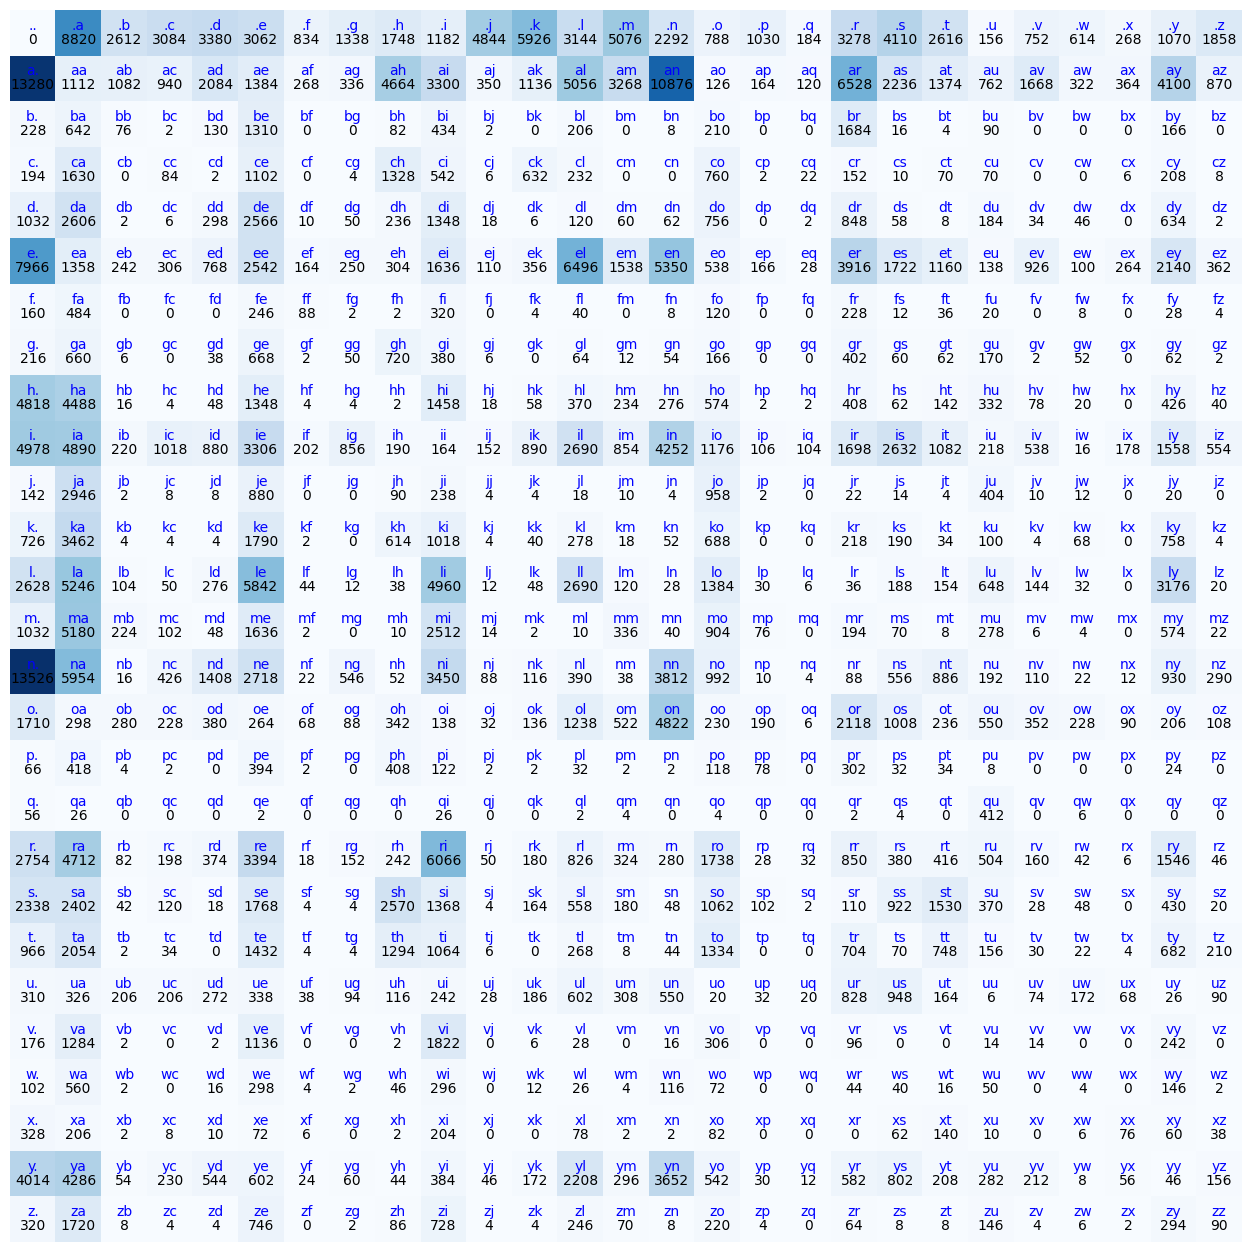

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues') 
for i in range(27): 
    for j in range(27): 
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color = 'blue')
        plt.text(j, i , N[i, j].item(), ha='center', va='top', color='black')
        
plt.axis('off')
        

In [111]:
P = (N+1).float() # Add-one smoothing
P /= P.sum(dim=1, keepdim=True)

In [112]:
# Check that the rows sum to 1
P.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

## Name Generation 

In [114]:
g = torch.Generator().manual_seed(42)

for i in range(10): 
    out = []
    idx = 0 
    while True: 
        
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[idx])
        if idx == 0: 
            break
        
    print(''.join(out))
    

ya.
syahavilin.
dleekahmangonya.
tryahe.
chen.
ena.
da.
amiiae.
a.
keles.


## Loss Function 

Goal is to maximize liklihood of the data with respect to the model parameters 
- = maximizinig log likelihood (because log is monotonic)
- = minimize negative log liklihodd
- = minimize normalized negative log liklihood

In [113]:
log_likelihood = 0
n = 0 
#for w in words[:3]:
for w in ["maximilian"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f}, {logprob:.4f}')

print(f'Log likelihood: {log_likelihood:.4f}')
nnl = -log_likelihood
print(f'Negative log likelihood: {nnl:.4f}')
norm_nnl = nnl / n
print(f'Normalized negative log likelihood: {norm_nnl:.4f}')

.m: 0.0792, -2.5356
ma: 0.3892, -0.9436
ax: 0.0054, -5.2244
xi: 0.1443, -1.9361
im: 0.0241, -3.7242
mi: 0.1888, -1.6671
il: 0.0760, -2.5776
li: 0.1775, -1.7286
ia: 0.1381, -1.9801
an: 0.1604, -1.8299
n.: 0.3688, -0.9976
Log likelihood: -25.1447
Negative log likelihood: 25.1447
Normalized negative log likelihood: 2.2859


# Neural Net Bigram

In [146]:
import torch.nn.functional as F

In [151]:
# Creating training dataset 
xs, ys = [], []

for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
 
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'Number of training examples: {num}')

# Creating the model
g = torch.Generator().manual_seed(42)
W = torch.randn((27, 27), generator= g, requires_grad=True)      

Number of training examples: 228146


In [116]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [153]:
for k in range(10): 
    
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp()  # counts, equivialent to N 
    probs = counts / counts.sum(dim=1, keepdim=True) # probabilities, equivalent to P
    
    loss = - probs[torch.arange(num), ys].log().mean() # negative log likelihood
    print(f'Iteration {k}, loss: {loss.item()}')
    
    # backward pass
    W.grad = None 
    loss.backward()
    W.data += -5 * W.grad # learning rate is ridiculously high here but can probably be turned even higher 
    

Iteration 0, loss: 3.689086675643921
Iteration 1, loss: 3.6519217491149902
Iteration 2, loss: 3.61647891998291
Iteration 3, loss: 3.5826098918914795
Iteration 4, loss: 3.5501861572265625
Iteration 5, loss: 3.5190963745117188
Iteration 6, loss: 3.489243745803833
Iteration 7, loss: 3.460545778274536
Iteration 8, loss: 3.4329309463500977
Iteration 9, loss: 3.406338691711426
